<a href="https://colab.research.google.com/github/DCI-alxogm/ml2023-BlackPuma075/blob/main/Sep_8_9/Car_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [158]:
import pandas as pd
from IPython.display import Image
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import numpy as np

In [41]:
from pandas.core.api import DataFrame
#Data taken from https://www.kaggle.com/datasets/goyalshalini93/car-data
df=pd.read_csv("/content/drive/MyDrive/Machine_Learning/CarPrice_Assignment.csv")

In [3]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [140]:
#Separate Numerical and  Categorical data

In [139]:
tipo_de_dato = df.dtypes

# Crear listas para almacenar las columnas numéricas y categóricas
columnas_numericas = [columna for columna, tipo in tipo_de_dato.items() if pd.api.types.is_numeric_dtype(tipo)]
columnas_categoricas = [columna for columna, tipo in tipo_de_dato.items() if not pd.api.types.is_numeric_dtype(tipo)]


print("Columnas Numéricas:")
print(columnas_numericas)

print("\nColumnas Categóricas:")
print(columnas_categoricas)

Columnas Numéricas:
['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']

Columnas Categóricas:
['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']


In [7]:
#Analiza la dependencia del valor del auto como función de cada variable categorica

In [163]:
x = df['CarName']
x

0            alfa-romero giulia
1           alfa-romero stelvio
2      alfa-romero Quadrifoglio
3                   audi 100 ls
4                    audi 100ls
                 ...           
200             volvo 145e (sw)
201                 volvo 144ea
202                 volvo 244dl
203                   volvo 246
204                 volvo 264gl
Name: CarName, Length: 205, dtype: object

In [8]:
#Analiza la dependencia del valor del auto como función de cada variable numerica

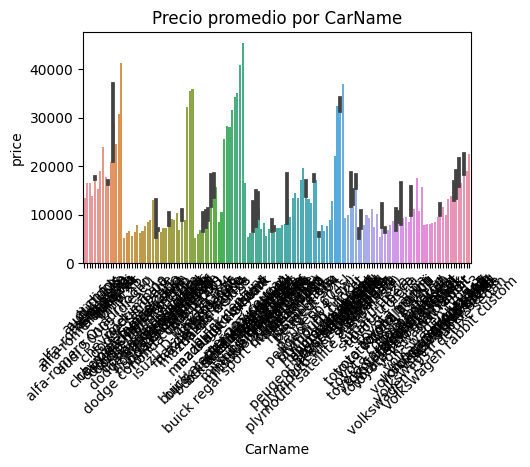

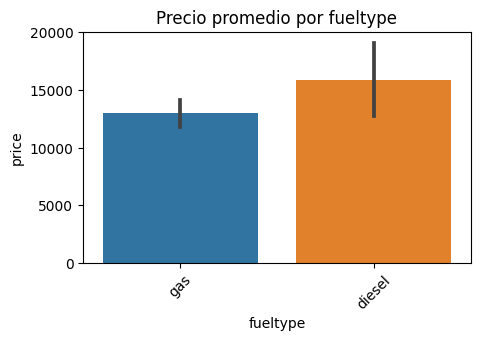

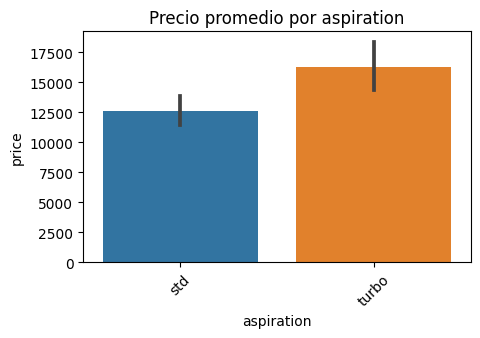

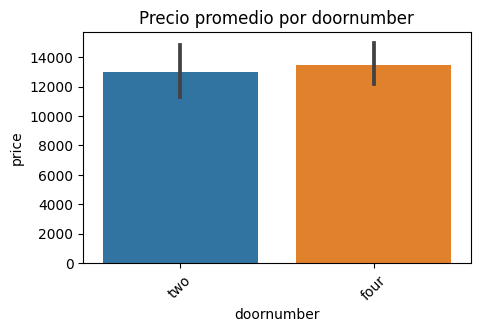

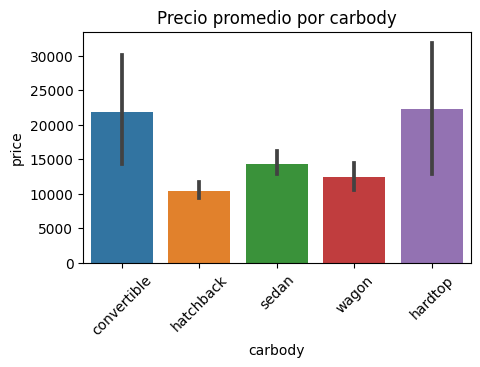

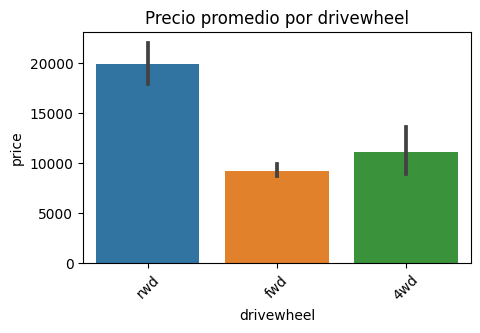

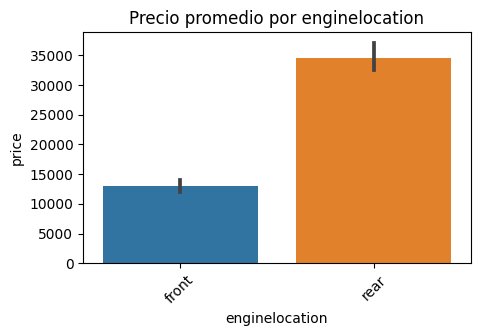

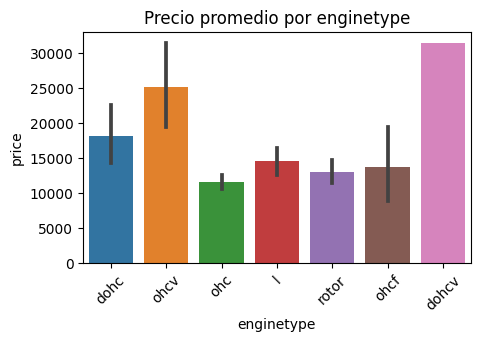

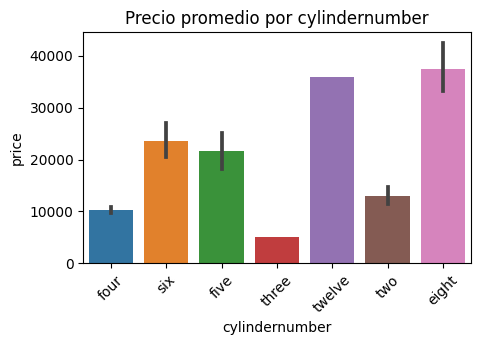

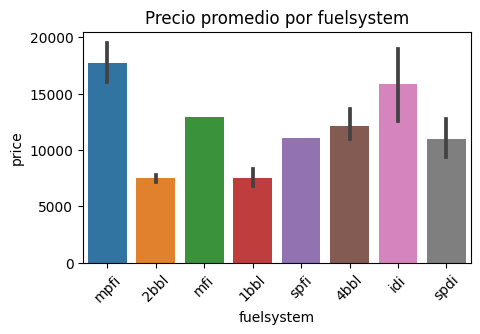

In [181]:
for columna_categorica in columnas_categoricas:
    plt.figure(figsize=(5, 3))
    sns.barplot(x=columna_categorica, y='price', data=df)
    plt.xticks(rotation=45)
    plt.title(f'Precio promedio por {columna_categorica}')
    plt.show()

In [191]:
#Define que variables numericas y categoricas usarás para crear tu modelo lineal.
use_vars=['horsepower', 'enginesize']
categorical_vars=['fuelsystem', 'cylindernumber', 'enginetype']

In [195]:
#Convierte las variables categoricas en variables "dummy" usando el siguiente código
df=df[use_vars]
df=pd.get_dummies(df,columns=categorical_vars,drop_first=True)

<Axes: >

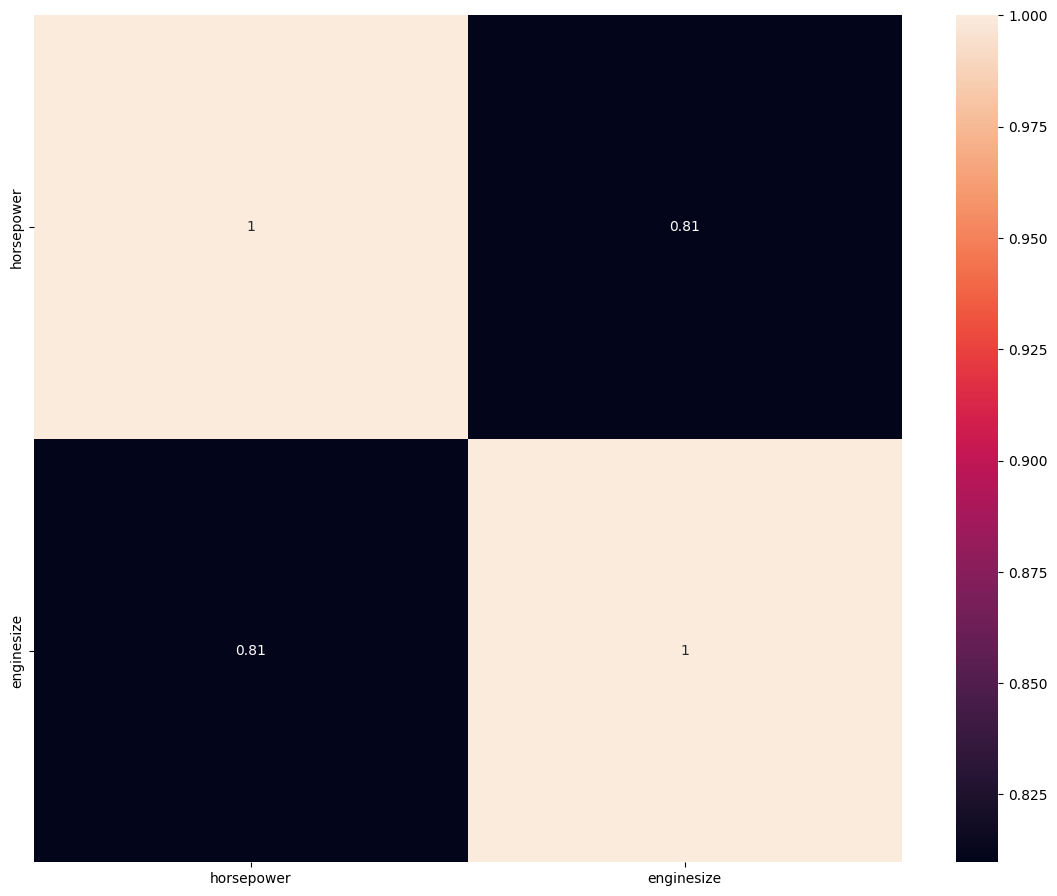

In [194]:
#Checa la correlación entre todas las variables usando un "heat map "
fig,ax=plt.subplots(1,1,figsize=(14,11))
sns.heatmap(df.corr(),annot=True)

In [11]:
#Construye la matriz de caracteristicas X y el vector de target t.
#Normaliza las caracteristicas y procede a generar el modelo.
# Usa el 20% de los datos como conjunto de validación
# Utiliza Keras () para que puedas analizar la dependencia de la función costo como función del parametro de aprendizaje, para diferentes valores, y decidas cual usar.
# Posteriormente utiliza scikit-learn para comprobar tu resultado

In [12]:
#Prueba con otros modelos, donde uses mas o menos caracteristicas. ¿cuál es el modelo que mejor desempeño tiene?